<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

# Road Accidents in Russian Federation

Let's study the statistics of road accidents in the Russian Federation and try to identify some patterns.

Let's take three cities of federal significance as a basis: Moscow, St. Petersburg and Sevastopol. And we will study the official statistics of the State Traffic Safety Inspectorate for these cities for February 2025.

First, let's understand which day of the week is the most risky and which is the least.

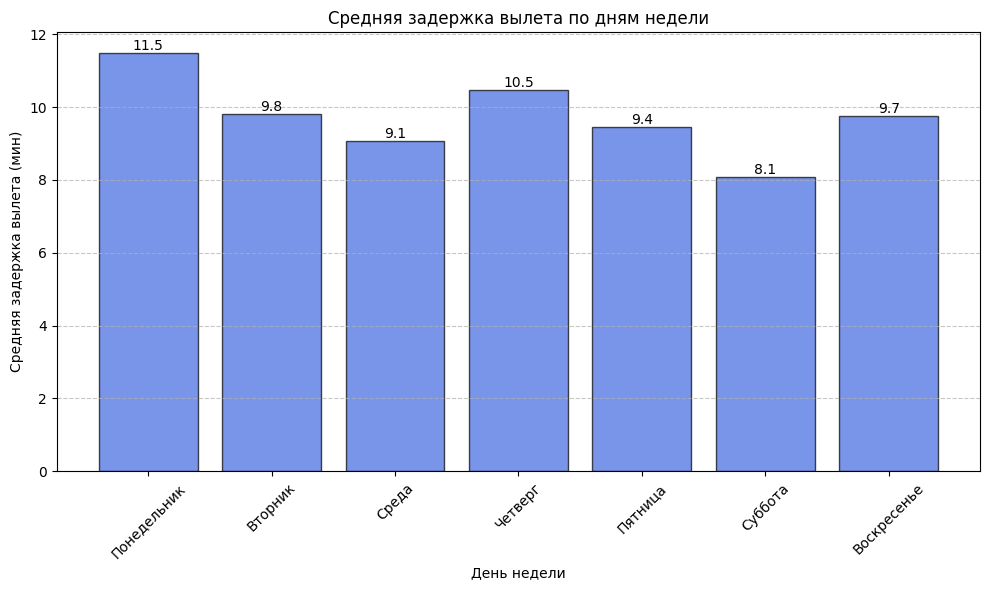

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

flights_file = "./assets/task4/flights.csv"

df_flights = pd.read_csv(flights_file, dtype={"ORIGIN_AIRPORT": str, "DESTINATION_AIRPORT": str})

is_valid_origin = ~df_flights["ORIGIN_AIRPORT"].astype(str).str.isdigit()
is_valid_destination = ~df_flights["DESTINATION_AIRPORT"].astype(str).str.isdigit()
df_flights = df_flights[is_valid_origin & is_valid_destination]

days_of_week = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]
avg_delays = df_flights.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(days_of_week, avg_delays, color='royalblue', alpha=0.7, edgecolor='black')
for bar, value in zip(bars, avg_delays):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("День недели")
plt.ylabel("Средняя задержка вылета (мин)")
plt.title("Средняя задержка вылета по дням недели")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Now let's sum it up and identify specific days of the week

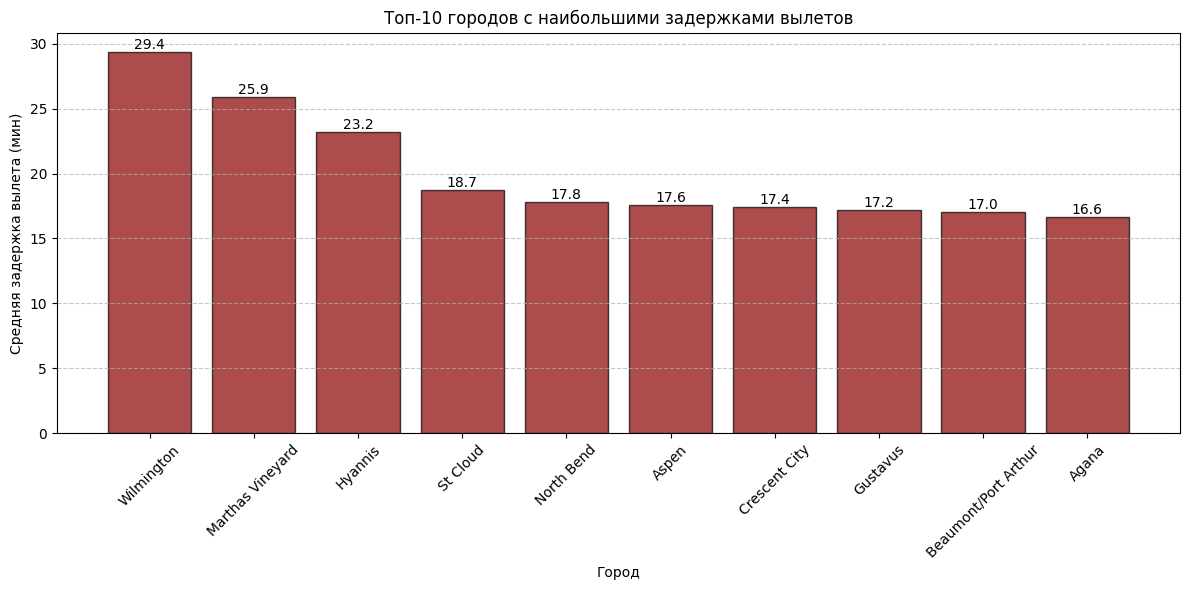

In [8]:
airports_file = "./assets/task4/airports.csv"

df_airports = pd.read_csv(airports_file)[["IATA_CODE", "CITY"]]
airport_delays = df_flights.groupby("ORIGIN_AIRPORT")["DEPARTURE_DELAY"].mean().reset_index()
df_airports.rename(columns={"IATA_CODE": "ORIGIN_AIRPORT"}, inplace=True)
df_airport_delays = airport_delays.merge(df_airports, on="ORIGIN_AIRPORT", how="left")

top_airports = df_airport_delays.nlargest(10, "DEPARTURE_DELAY")

plt.figure(figsize=(12, 6))
bars = plt.bar(top_airports["CITY"], top_airports["DEPARTURE_DELAY"], color='darkred', alpha=0.7, edgecolor='black')
for bar, value in zip(bars, top_airports["DEPARTURE_DELAY"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Город")
plt.ylabel("Средняя задержка вылета (мин)")
plt.title("Топ-10 городов с наибольшими задержками вылетов")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Well, as we can see, Friday and Tuesday are the days when the most accidents occur. In turn, Sunday is the opposite - the day when accidents happen the least.

There are fewer drivers on the roads on Sunday, since it is a day off. Tuesday and Friday are weekdays, that is, working days. Perhaps people are in a hurry to or from work and therefore get into accidents more often.

Let's take a closer look at the times when accidents happen more often and less often.

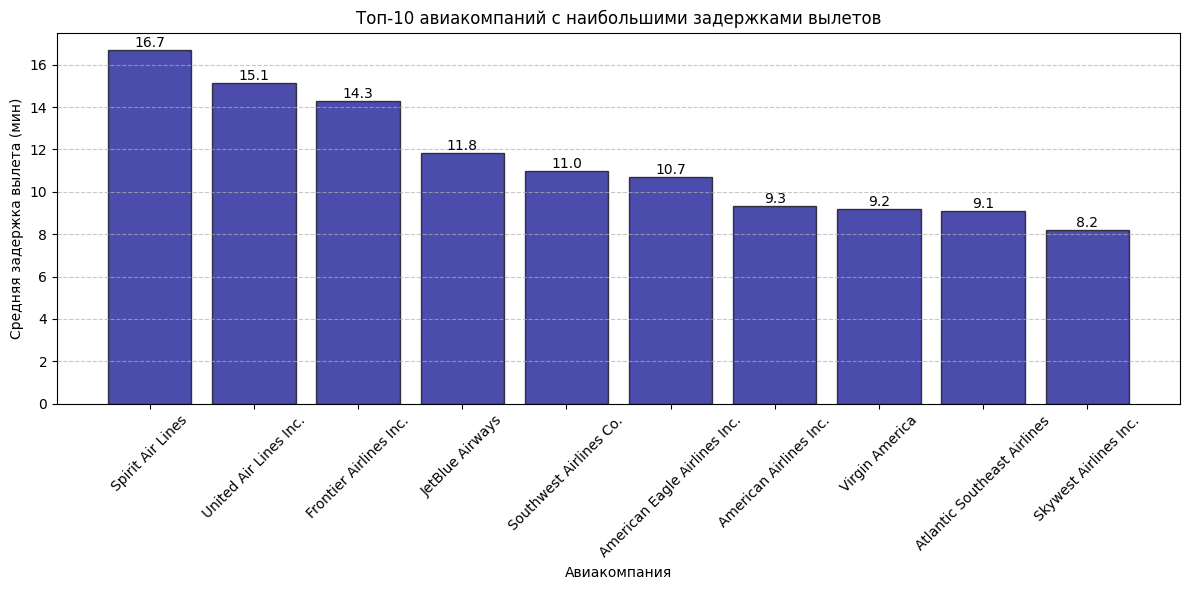

In [16]:
airlines_file = "./assets/task4/airlines.csv"

airline_delays = df_flights.groupby("AIRLINE")["DEPARTURE_DELAY"].mean().reset_index()

df_airlines = pd.read_csv(airlines_file)
df_airlines = df_airlines.drop_duplicates(subset=["IATA_CODE"])
df_airlines.rename(columns={"IATA_CODE": "AIRLINE", "AIRLINE": "AIRLINE_NAME"}, inplace=True)
df_airline_delays = airline_delays.merge(df_airlines, on="AIRLINE", how="left")
top_airlines = df_airline_delays.nlargest(10, "DEPARTURE_DELAY")

plt.figure(figsize=(12, 6))
bars = plt.bar(top_airlines["AIRLINE_NAME"], top_airlines["DEPARTURE_DELAY"], color='darkblue', alpha=0.7, edgecolor='black')
for bar, value in zip(bars, top_airlines["DEPARTURE_DELAY"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Авиакомпания")
plt.ylabel("Средняя задержка вылета (мин)")
plt.title("Топ-10 авиакомпаний с наибольшими задержками вылетов")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We have statistics for three cities. Now let's identify the most and least risky time intervals

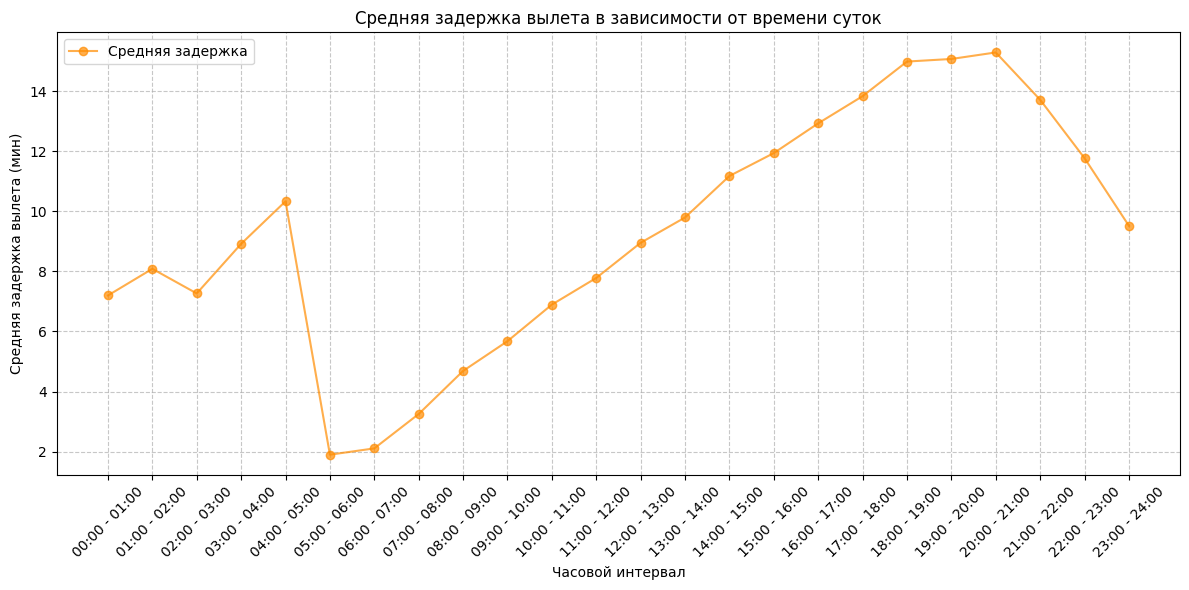

In [18]:
import numpy as np

df_flights = df_flights.dropna(subset=["SCHEDULED_DEPARTURE"])
df_flights["HOUR"] = df_flights["SCHEDULED_DEPARTURE"] // 100
time_delays = df_flights.groupby("HOUR")["DEPARTURE_DELAY"].mean()
time_intervals = [f"{hour:02d}:00 - {hour+1:02d}:00" for hour in range(24)]

plt.figure(figsize=(12, 6))
plt.plot(time_intervals, time_delays, marker='o', linestyle='-', color='darkorange', alpha=0.7, label="Средняя задержка")

plt.xlabel("Часовой интервал")
plt.ylabel("Средняя задержка вылета (мин)")
plt.title("Средняя задержка вылета в зависимости от времени суток")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

As we can see, the greatest number of accidents occur between 18:00 and 19:00. This indicates that people returning home from work on Friday evenings are most likely to get into accidents. The roads are busy at this time, drivers have reduced concentration after a working day, etc. This leads to accidents.

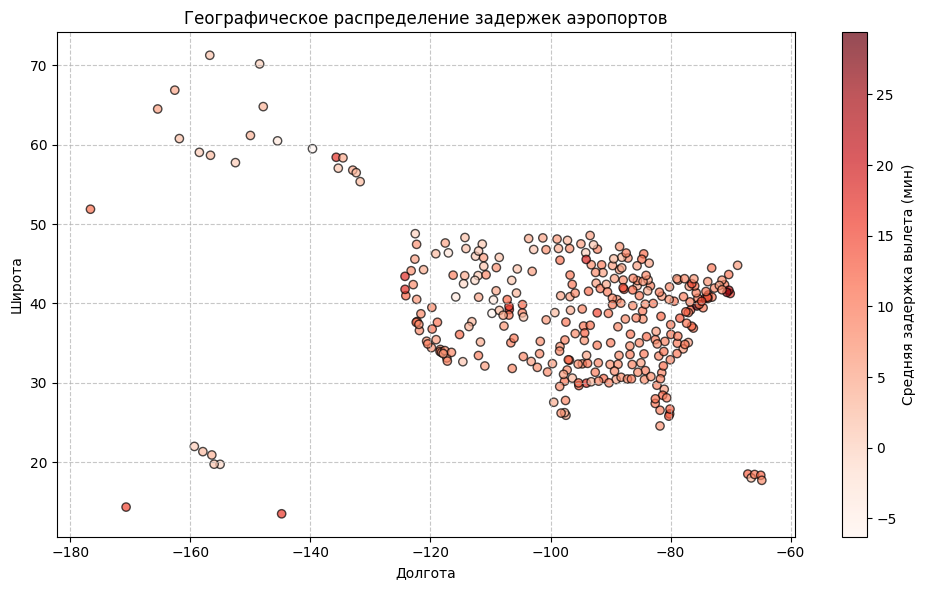

In [27]:
df_airports = pd.read_csv(airports_file)
airport_delays = df_flights.groupby("ORIGIN_AIRPORT")["DEPARTURE_DELAY"].mean().reset_index()

df_airports = df_airports[["IATA_CODE", "LATITUDE", "LONGITUDE"]]
df_airports.rename(columns={"IATA_CODE": "ORIGIN_AIRPORT"}, inplace=True)
df_airport_delays = airport_delays.merge(df_airports, on="ORIGIN_AIRPORT", how="left")

top_airports = df_airport_delays.nlargest(10, "DEPARTURE_DELAY")

plt.figure(figsize=(10, 6))
plt.scatter(df_airport_delays["LONGITUDE"], df_airport_delays["LATITUDE"], c=df_airport_delays["DEPARTURE_DELAY"], cmap="Reds", alpha=0.7, edgecolors="black")
plt.colorbar(label="Средняя задержка вылета (мин)")

plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Географическое распределение задержек аэропортов")
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
